In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#fetching data from my drive
import pandas as pd
data=pd.read_csv(r"C:\Users\malik\flight1512.csv")
data.head()

,Unnamed: 0,Name,id,price,arrival time,departure time,hours taken,starting point,destination,hour taken,minutes taken,minutes taken 2
0,0,Go First,G8-530,5954.0,7:00,9:10,2 10m,New Delhi,Mumbai,2.0,10m,10.0
1,1,Go First,G8-334,5954.0,8:00,10:10,2 10m,New Delhi,Mumbai,2.0,10m,10.0
2,2,Go First,G8-354,5954.0,22:30,00:40\n,2 10m,New Delhi,Mumbai,2.0,10m,10.0
3,3,Go First,G8-2501,5954.0,2:00,4:15,2 15m,New Delhi,Mumbai,2.0,15m,15.0
4,4,Go First,G8-336,5954.0,14:20,16:35,2 15m,New Delhi,Mumbai,2.0,15m,15.0


In [3]:
#getting information about data type 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1610 non-null   int64  
 1   Name             1610 non-null   object 
 2   id               1610 non-null   object 
 3   price            1018 non-null   float64
 4   arrival time     1470 non-null   object 
 5   departure time   1158 non-null   object 
 6   hours taken      998 non-null    object 
 7   starting point   1590 non-null   object 
 8   destination      1018 non-null   object 
 9   hour taken       998 non-null    float64
 10  minutes taken    998 non-null    object 
 11  minutes taken 2  998 non-null    float64
dtypes: float64(3), int64(1), object(8)
memory usage: 151.1+ KB


In [4]:
# describeing data mean ,standard deviation etc
data.describe()

,Unnamed: 0,price,hour taken,minutes taken 2
count,1610.000000,1018.000000,998.000000,998.000000
mean,262.186335,9286.603143,8.621242,23.306613
std,196.797960,3641.787012,7.159091,15.766545
min,0.000000,4262.000000,1.000000,0.000000
25%,100.000000,6113.000000,2.000000,10.000000
50%,202.000000,8448.500000,7.000000,20.000000
75%,403.000000,11048.000000,12.000000,35.000000
max,734.000000,33836.000000,33.000000,55.000000


In [5]:
# checking for no of rows and columns
data.shape

(1610, 12)

In [6]:
#checking for null values 
data.isna().sum()

Unnamed: 0           0
Name                 0
id                   0
price              592
arrival time       140
departure time     452
hours taken        612
starting point      20
destination        592
hour taken         612
minutes taken      612
minutes taken 2    612
dtype: int64

In [7]:
#filling null values
data.fillna(data.mean(), inplace=True)

In [8]:
data.isna().sum()

Unnamed: 0           0
Name                 0
id                   0
price                0
arrival time       140
departure time     452
hours taken        612
starting point      20
destination        592
hour taken           0
minutes taken      612
minutes taken 2      0
dtype: int64

In [9]:
#filling categorical data
data.fillna(data.median(), inplace=True)

In [10]:
data.isna().sum()

Unnamed: 0           0
Name                 0
id                   0
price                0
arrival time       140
departure time     452
hours taken        612
starting point      20
destination        592
hour taken           0
minutes taken      612
minutes taken 2      0
dtype: int64

In [11]:
# Departure time is when a plane leaves the gate.
# Similar to the Date_of_Journey we can extract values from Dep_Time

#Extracting Hours 
data["Dep_hour"] = pd.to_datetime(data["departure time"]).dt.hour

# Extracting Minutes 
data["Dep_min"] = pd.to_datetime(data["departure time"]).dt.minute



In [12]:
# Now we can drop Dep_Time as it of no use
data.drop(["departure time"], axis = 1, inplace = True)

In [13]:
data.head(3)

,Unnamed: 0,Name,id,price,arrival time,hours taken,starting point,destination,hour taken,minutes taken,minutes taken 2,Dep_hour,Dep_min
0,0,Go First,G8-530,5954.0,7:00,2 10m,New Delhi,Mumbai,2.0,10m,10.0,9.0,10.0
1,1,Go First,G8-334,5954.0,8:00,2 10m,New Delhi,Mumbai,2.0,10m,10.0,10.0,10.0
2,2,Go First,G8-354,5954.0,22:30,2 10m,New Delhi,Mumbai,2.0,10m,10.0,0.0,40.0


In [14]:
# arrival time .


#Extracting Hours 
data["arr_hour"] = pd.to_datetime(data["arrival time"]).dt.hour

# Extracting Minutes 
data["arr_min"] = pd.to_datetime(data["arrival time"]).dt.minute


In [15]:
data.head(3)

,Unnamed: 0,Name,id,price,arrival time,hours taken,starting point,destination,hour taken,minutes taken,minutes taken 2,Dep_hour,Dep_min,arr_hour,arr_min
0,0,Go First,G8-530,5954.0,7:00,2 10m,New Delhi,Mumbai,2.0,10m,10.0,9.0,10.0,7.0,0.0
1,1,Go First,G8-334,5954.0,8:00,2 10m,New Delhi,Mumbai,2.0,10m,10.0,10.0,10.0,8.0,0.0
2,2,Go First,G8-354,5954.0,22:30,2 10m,New Delhi,Mumbai,2.0,10m,10.0,0.0,40.0,22.0,30.0


In [16]:
# Now we can drop Dep_Time as it of no use
#data.drop(["arrival time"], axis = 1, inplace = True)

In [17]:

data["Name"].value_counts()

IndiGo       550
Vistara      335
Go First     299
Air India    230
Air Asia     110
SpiceJet      86
Name: Name, dtype: int64

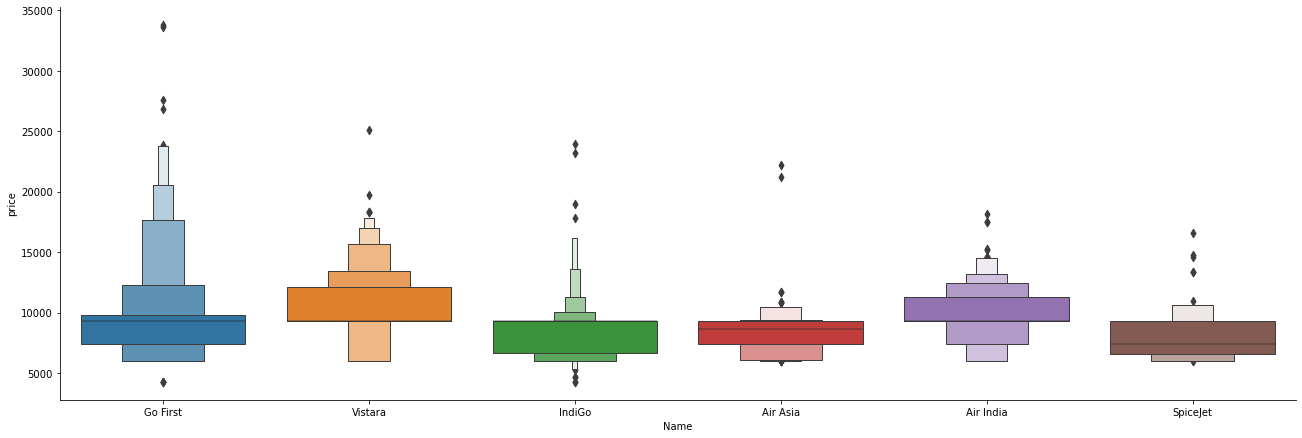

In [18]:
# From grap we can see that go first Airways Business have the highest Price
# Apart from the first Airlines almost all are having similar median

# Airline vs price 
sns.catplot(y= "price", x = "Name", data = data.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [19]:
# As Airline is Nominal Categorical data, we will perform OneHotEncoder

Airline = data[["Name"]]
Airline = pd.get_dummies(Airline, drop_first =True)

Airline.head()

,Name_Air India,Name_Go First,Name_IndiGo,Name_SpiceJet,Name_Vistara
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [20]:
data["destination"].value_counts()

Mumbai       495
Hyderabad    221
New Delhi    208
Pune          94
Name: destination, dtype: int64

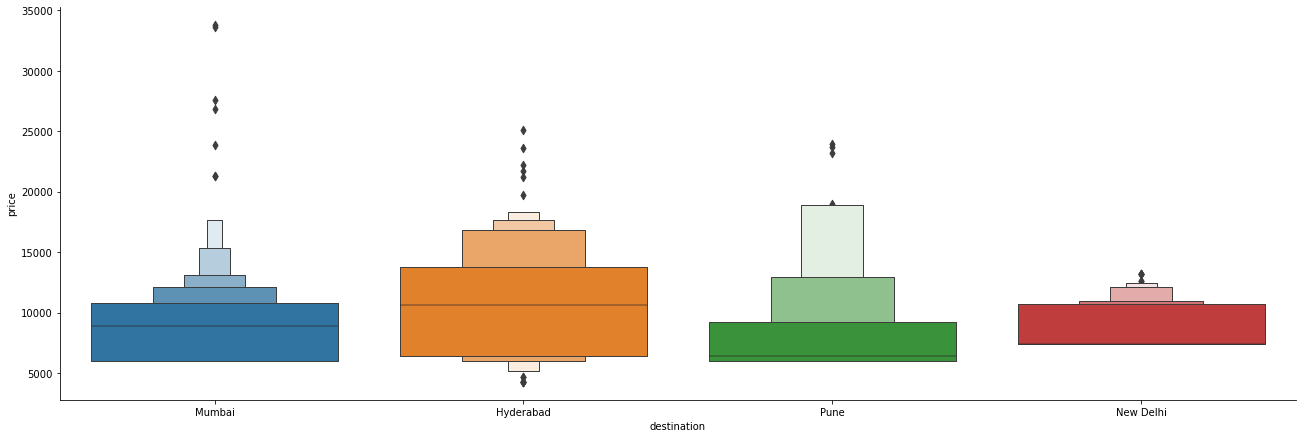

In [21]:
# Compare Source and Price


sns.catplot(y = "price", x= "destination", data = data.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)

In [22]:
# As source is Nominal categorical data, we will perform OneHotEncoding 
# Bangalore Source can be representated by OOOO
Source =data[["starting point"]]

Source =pd.get_dummies(Source, drop_first=True)

Source.head()

,starting point_Mumbai,starting point_New Delhi,starting point_Pune
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [23]:
data["starting point"].value_counts()

New Delhi    691
Hyderabad    458
Mumbai       334
Pune         107
Name: starting point, dtype: int64

In [24]:
# As Destination is Nominal categorical data, we will perform OneHotEncoding 

Destination1 =data[["destination"]]

Destination1 =pd.get_dummies(Destination1, drop_first=True)

Destination1.head()

,destination_Mumbai,destination_New Delhi,destination_Pune
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [25]:
data.head(3)

,Unnamed: 0,Name,id,price,arrival time,hours taken,starting point,destination,hour taken,minutes taken,minutes taken 2,Dep_hour,Dep_min,arr_hour,arr_min
0,0,Go First,G8-530,5954.0,7:00,2 10m,New Delhi,Mumbai,2.0,10m,10.0,9.0,10.0,7.0,0.0
1,1,Go First,G8-334,5954.0,8:00,2 10m,New Delhi,Mumbai,2.0,10m,10.0,10.0,10.0,8.0,0.0
2,2,Go First,G8-354,5954.0,22:30,2 10m,New Delhi,Mumbai,2.0,10m,10.0,0.0,40.0,22.0,30.0


In [26]:
data["destination"].value_counts()

Mumbai       495
Hyderabad    221
New Delhi    208
Pune          94
Name: destination, dtype: int64

In [28]:
# Concatenate dataframe that consist of train_data, Airline, Source,  and Destination
data=pd.concat([data,Airline,Source,Destination1], axis=1)

In [29]:
data.head(3)

,Unnamed: 0,Name,id,price,arrival time,hours taken,starting point,destination,hour taken,minutes taken,...,Name_Go First,Name_IndiGo,Name_SpiceJet,Name_Vistara,starting point_Mumbai,starting point_New Delhi,starting point_Pune,destination_Mumbai,destination_New Delhi,destination_Pune
0,0,Go First,G8-530,5954.0,7:00,2 10m,New Delhi,Mumbai,2.0,10m,...,1,0,0,0,0,1,0,1,0,0
1,1,Go First,G8-334,5954.0,8:00,2 10m,New Delhi,Mumbai,2.0,10m,...,1,0,0,0,0,1,0,1,0,0
2,2,Go First,G8-354,5954.0,22:30,2 10m,New Delhi,Mumbai,2.0,10m,...,1,0,0,0,0,1,0,1,0,0


In [30]:
data.drop(["Name","starting point", "destination"], axis=1, inplace=True)

In [31]:
data.head(3)

,Unnamed: 0,id,price,arrival time,hours taken,hour taken,minutes taken,minutes taken 2,Dep_hour,Dep_min,...,Name_Go First,Name_IndiGo,Name_SpiceJet,Name_Vistara,starting point_Mumbai,starting point_New Delhi,starting point_Pune,destination_Mumbai,destination_New Delhi,destination_Pune
0,0,G8-530,5954.0,7:00,2 10m,2.0,10m,10.0,9.0,10.0,...,1,0,0,0,0,1,0,1,0,0
1,1,G8-334,5954.0,8:00,2 10m,2.0,10m,10.0,10.0,10.0,...,1,0,0,0,0,1,0,1,0,0
2,2,G8-354,5954.0,22:30,2 10m,2.0,10m,10.0,0.0,40.0,...,1,0,0,0,0,1,0,1,0,0


In [32]:
data.drop(["Unnamed: 0"], axis=1, inplace=True)

In [33]:
data.drop(["minutes taken"], axis=1, inplace=True)

In [34]:
data.drop(["hours taken"], axis=1, inplace=True)

In [35]:
data.columns


Index(['id', 'price', 'arrival time', 'hour taken', 'minutes taken 2',
       'Dep_hour', 'Dep_min', 'arr_hour', 'arr_min', 'Name_Air India',
       'Name_Go First', 'Name_IndiGo', 'Name_SpiceJet', 'Name_Vistara',
       'starting point_Mumbai', 'starting point_New Delhi',
       'starting point_Pune', 'destination_Mumbai', 'destination_New Delhi',
       'destination_Pune'],
      dtype='object')

In [36]:
#dropping date 
data.drop(['id'],axis=1,inplace=True)

In [37]:
data.head(5)

,price,arrival time,hour taken,minutes taken 2,Dep_hour,Dep_min,arr_hour,arr_min,Name_Air India,Name_Go First,Name_IndiGo,Name_SpiceJet,Name_Vistara,starting point_Mumbai,starting point_New Delhi,starting point_Pune,destination_Mumbai,destination_New Delhi,destination_Pune
0,5954.0,7:00,2.0,10.0,9.0,10.0,7.0,0.0,0,1,0,0,0,0,1,0,1,0,0
1,5954.0,8:00,2.0,10.0,10.0,10.0,8.0,0.0,0,1,0,0,0,0,1,0,1,0,0
2,5954.0,22:30,2.0,10.0,0.0,40.0,22.0,30.0,0,1,0,0,0,0,1,0,1,0,0
3,5954.0,2:00,2.0,15.0,4.0,15.0,2.0,0.0,0,1,0,0,0,0,1,0,1,0,0
4,5954.0,14:20,2.0,15.0,16.0,35.0,14.0,20.0,0,1,0,0,0,0,1,0,1,0,0


In [38]:
#dropping date 
data.drop(['arrival time'],axis=1,inplace=True)

In [39]:
data.head(3)

,price,hour taken,minutes taken 2,Dep_hour,Dep_min,arr_hour,arr_min,Name_Air India,Name_Go First,Name_IndiGo,Name_SpiceJet,Name_Vistara,starting point_Mumbai,starting point_New Delhi,starting point_Pune,destination_Mumbai,destination_New Delhi,destination_Pune
0,5954.0,2.0,10.0,9.0,10.0,7.0,0.0,0,1,0,0,0,0,1,0,1,0,0
1,5954.0,2.0,10.0,10.0,10.0,8.0,0.0,0,1,0,0,0,0,1,0,1,0,0
2,5954.0,2.0,10.0,0.0,40.0,22.0,30.0,0,1,0,0,0,0,1,0,1,0,0


In [40]:
#filling categorical data
data.fillna(data.median(), inplace=True)

In [41]:
data.isna().sum()

price                       0
hour taken                  0
minutes taken 2             0
Dep_hour                    0
Dep_min                     0
arr_hour                    0
arr_min                     0
Name_Air India              0
Name_Go First               0
Name_IndiGo                 0
Name_SpiceJet               0
Name_Vistara                0
starting point_Mumbai       0
starting point_New Delhi    0
starting point_Pune         0
destination_Mumbai          0
destination_New Delhi       0
destination_Pune            0
dtype: int64

In [42]:
#filling categorical data
data.fillna(data.mean(), inplace=True)

In [43]:
#filling categorical data
data.fillna(data.ffill(), inplace=True)

<AxesSubplot:>

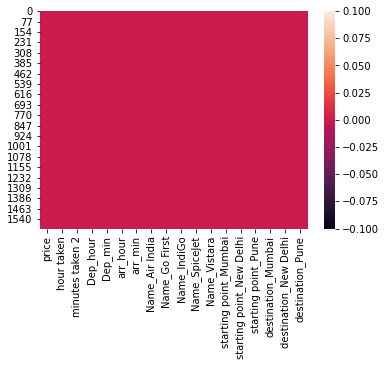

In [44]:
# Here we are getting details of the data like null values
sns.heatmap(data.isnull())

In [45]:
data.dtypes

price                       float64
hour taken                  float64
minutes taken 2             float64
Dep_hour                    float64
Dep_min                     float64
arr_hour                    float64
arr_min                     float64
Name_Air India                uint8
Name_Go First                 uint8
Name_IndiGo                   uint8
Name_SpiceJet                 uint8
Name_Vistara                  uint8
starting point_Mumbai         uint8
starting point_New Delhi      uint8
starting point_Pune           uint8
destination_Mumbai            uint8
destination_New Delhi         uint8
destination_Pune              uint8
dtype: object

In [46]:
data.head(5)

,price,hour taken,minutes taken 2,Dep_hour,Dep_min,arr_hour,arr_min,Name_Air India,Name_Go First,Name_IndiGo,Name_SpiceJet,Name_Vistara,starting point_Mumbai,starting point_New Delhi,starting point_Pune,destination_Mumbai,destination_New Delhi,destination_Pune
0,5954.0,2.0,10.0,9.0,10.0,7.0,0.0,0,1,0,0,0,0,1,0,1,0,0
1,5954.0,2.0,10.0,10.0,10.0,8.0,0.0,0,1,0,0,0,0,1,0,1,0,0
2,5954.0,2.0,10.0,0.0,40.0,22.0,30.0,0,1,0,0,0,0,1,0,1,0,0
3,5954.0,2.0,15.0,4.0,15.0,2.0,0.0,0,1,0,0,0,0,1,0,1,0,0
4,5954.0,2.0,15.0,16.0,35.0,14.0,20.0,0,1,0,0,0,0,1,0,1,0,0


In [47]:
#checking skewness
data.skew()

price                       2.329695
hour taken                  1.337600
minutes taken 2             0.636668
Dep_hour                   -0.105629
Dep_min                     0.117158
arr_hour                   -0.068507
arr_min                    -0.066011
Name_Air India              2.043145
Name_Go First               1.617888
Name_IndiGo                 0.668561
Name_SpiceJet               3.975778
Name_Vistara                1.439645
starting point_Mumbai       1.444299
starting point_New Delhi    0.286380
starting point_Pune         3.484327
destination_Mumbai          0.835327
destination_New Delhi       2.213113
destination_Pune            3.770431
dtype: float64

In [48]:
# removing skweness
from sklearn.preprocessing import power_transform
df_new=power_transform(data)

df_new=pd.DataFrame(df_new,columns=data.columns)

In [49]:
df_new.skew()

price                       0.000000
hour taken                 -0.011649
minutes taken 2             0.008271
Dep_hour                   -0.065779
Dep_min                    -0.261311
arr_hour                   -0.114142
arr_min                    -0.394265
Name_Air India              2.043145
Name_Go First               1.617888
Name_IndiGo                 0.668561
Name_SpiceJet               3.975778
Name_Vistara                1.439645
starting point_Mumbai       1.444299
starting point_New Delhi    0.286380
starting point_Pune         3.484327
destination_Mumbai          0.835327
destination_New Delhi       2.213113
destination_Pune            3.770431
dtype: float64

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     1610 non-null   float64
 1   hour taken                1610 non-null   float64
 2   minutes taken 2           1610 non-null   float64
 3   Dep_hour                  1610 non-null   float64
 4   Dep_min                   1610 non-null   float64
 5   arr_hour                  1610 non-null   float64
 6   arr_min                   1610 non-null   float64
 7   Name_Air India            1610 non-null   uint8  
 8   Name_Go First             1610 non-null   uint8  
 9   Name_IndiGo               1610 non-null   uint8  
 10  Name_SpiceJet             1610 non-null   uint8  
 11  Name_Vistara              1610 non-null   uint8  
 12  starting point_Mumbai     1610 non-null   uint8  
 13  starting point_New Delhi  1610 non-null   uint8  
 14  starting

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

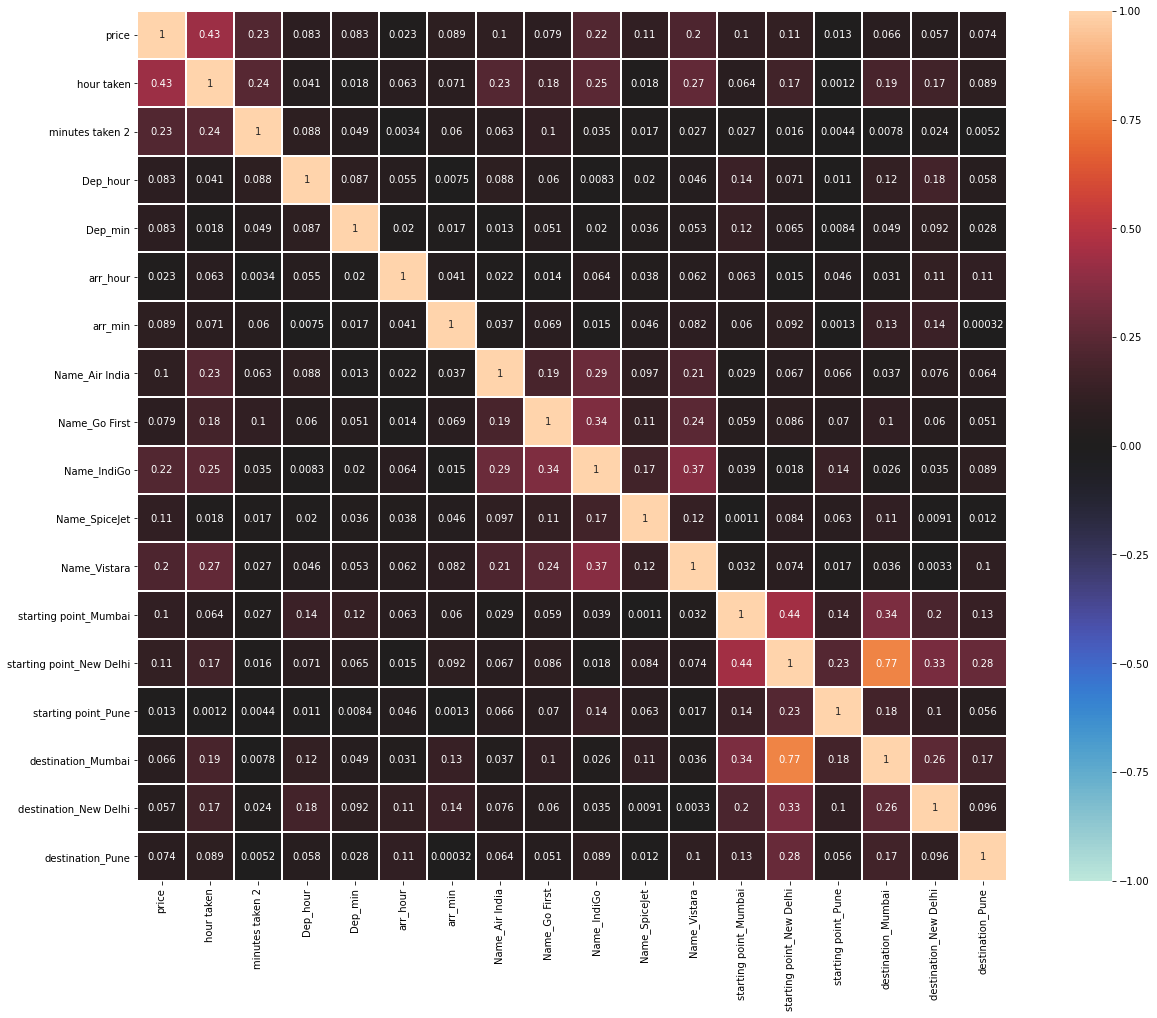

In [51]:
#heat map for corelation checking
df_corr =data.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr,  vmin=-1,annot=True,
           square=True,center=0,fmt='.2g',linewidths=1,)
plt.tight_layout

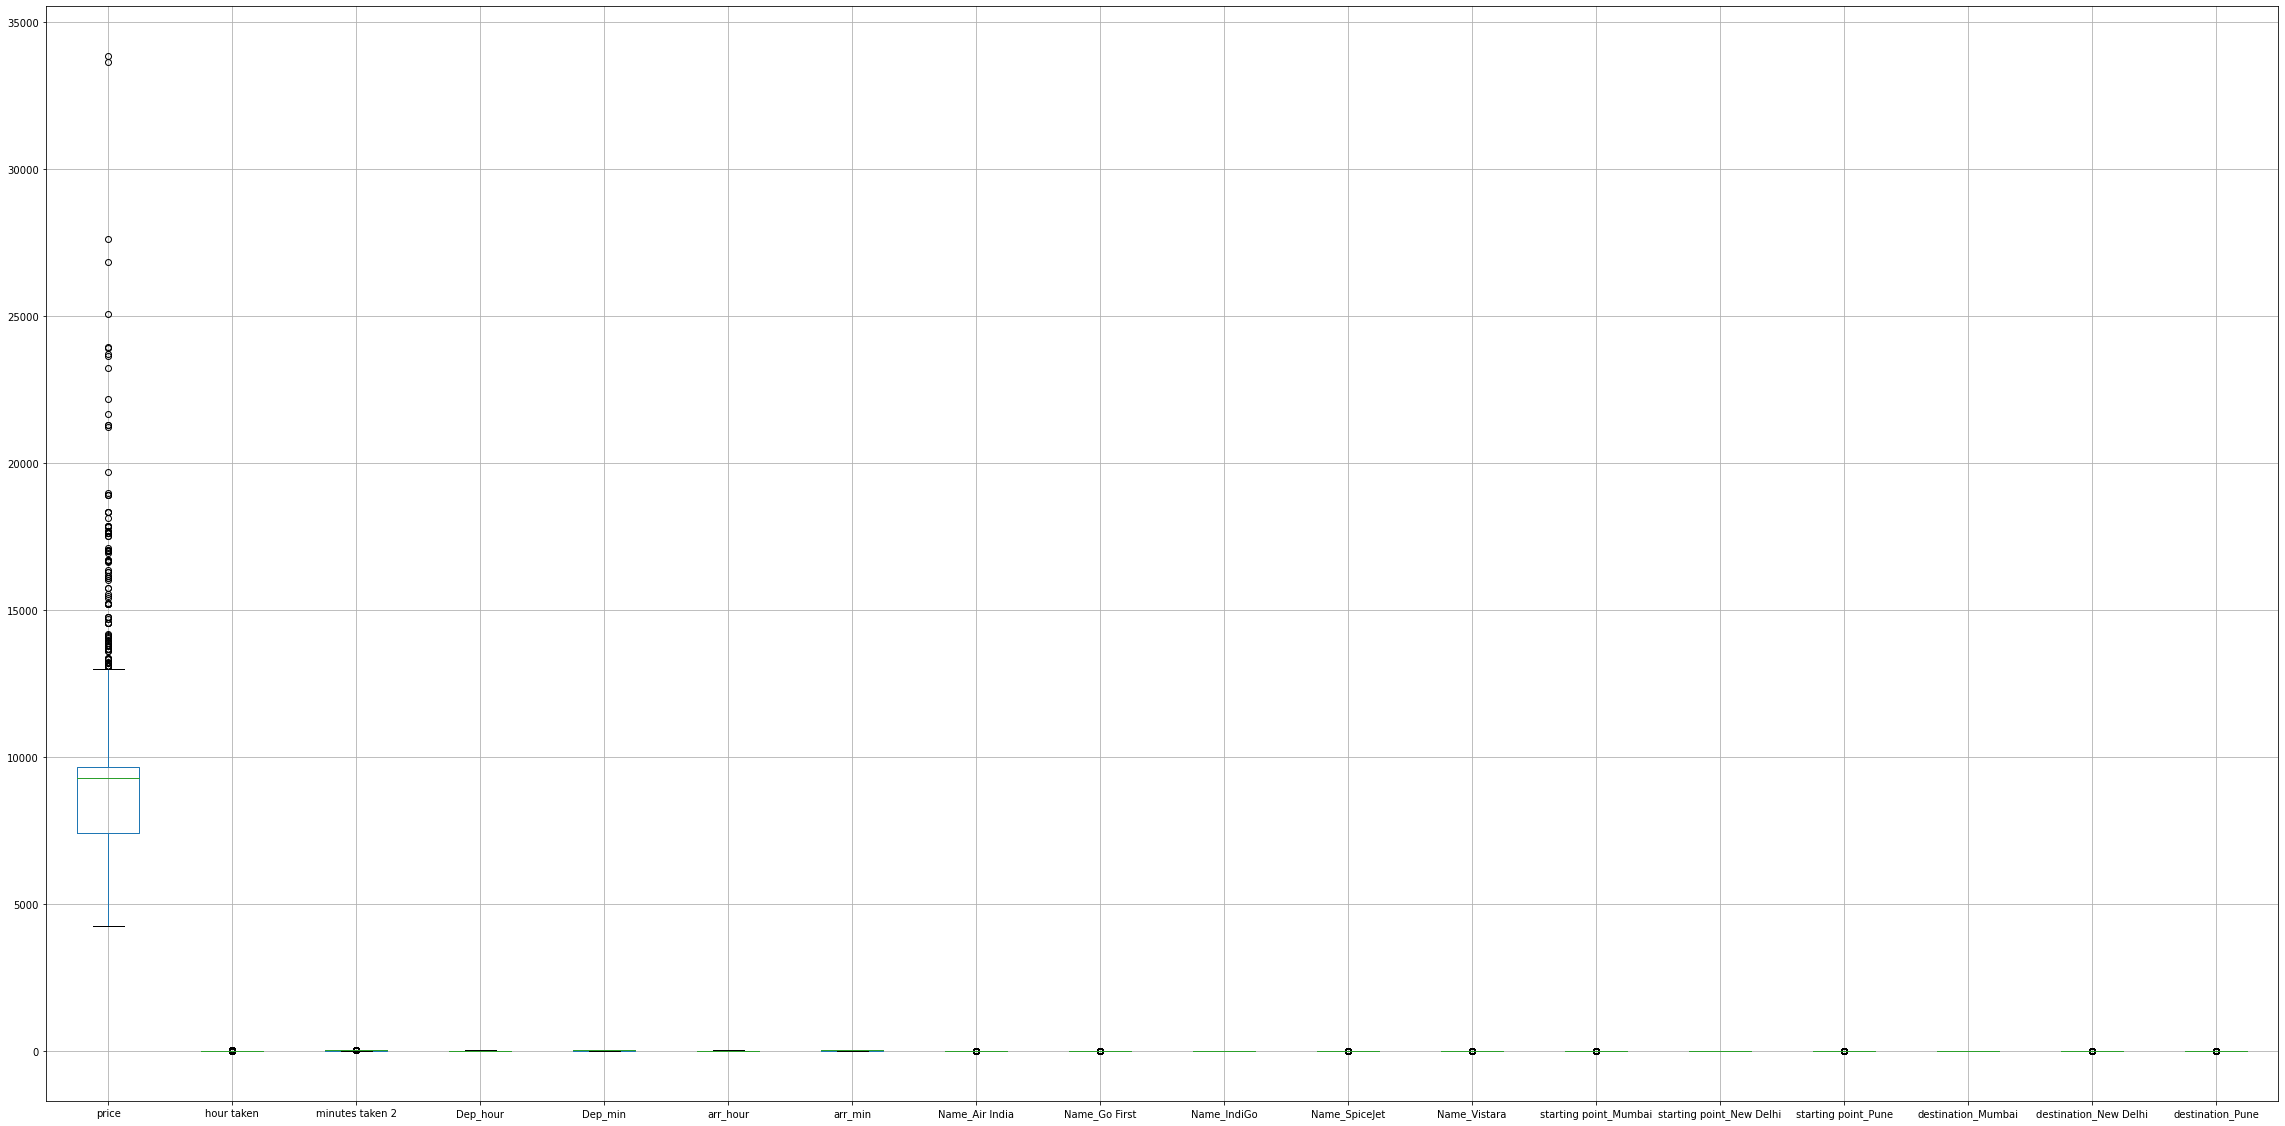

In [52]:
# plotting boxplot to identify outliers
data.boxplot(figsize=[40,40])
plt.subplots_adjust(bottom=0.5)
plt.show()

In [53]:
#removing data of outliers
q=data['price'].quantile(0.60)
data_cleaned =data[data['price']<q]

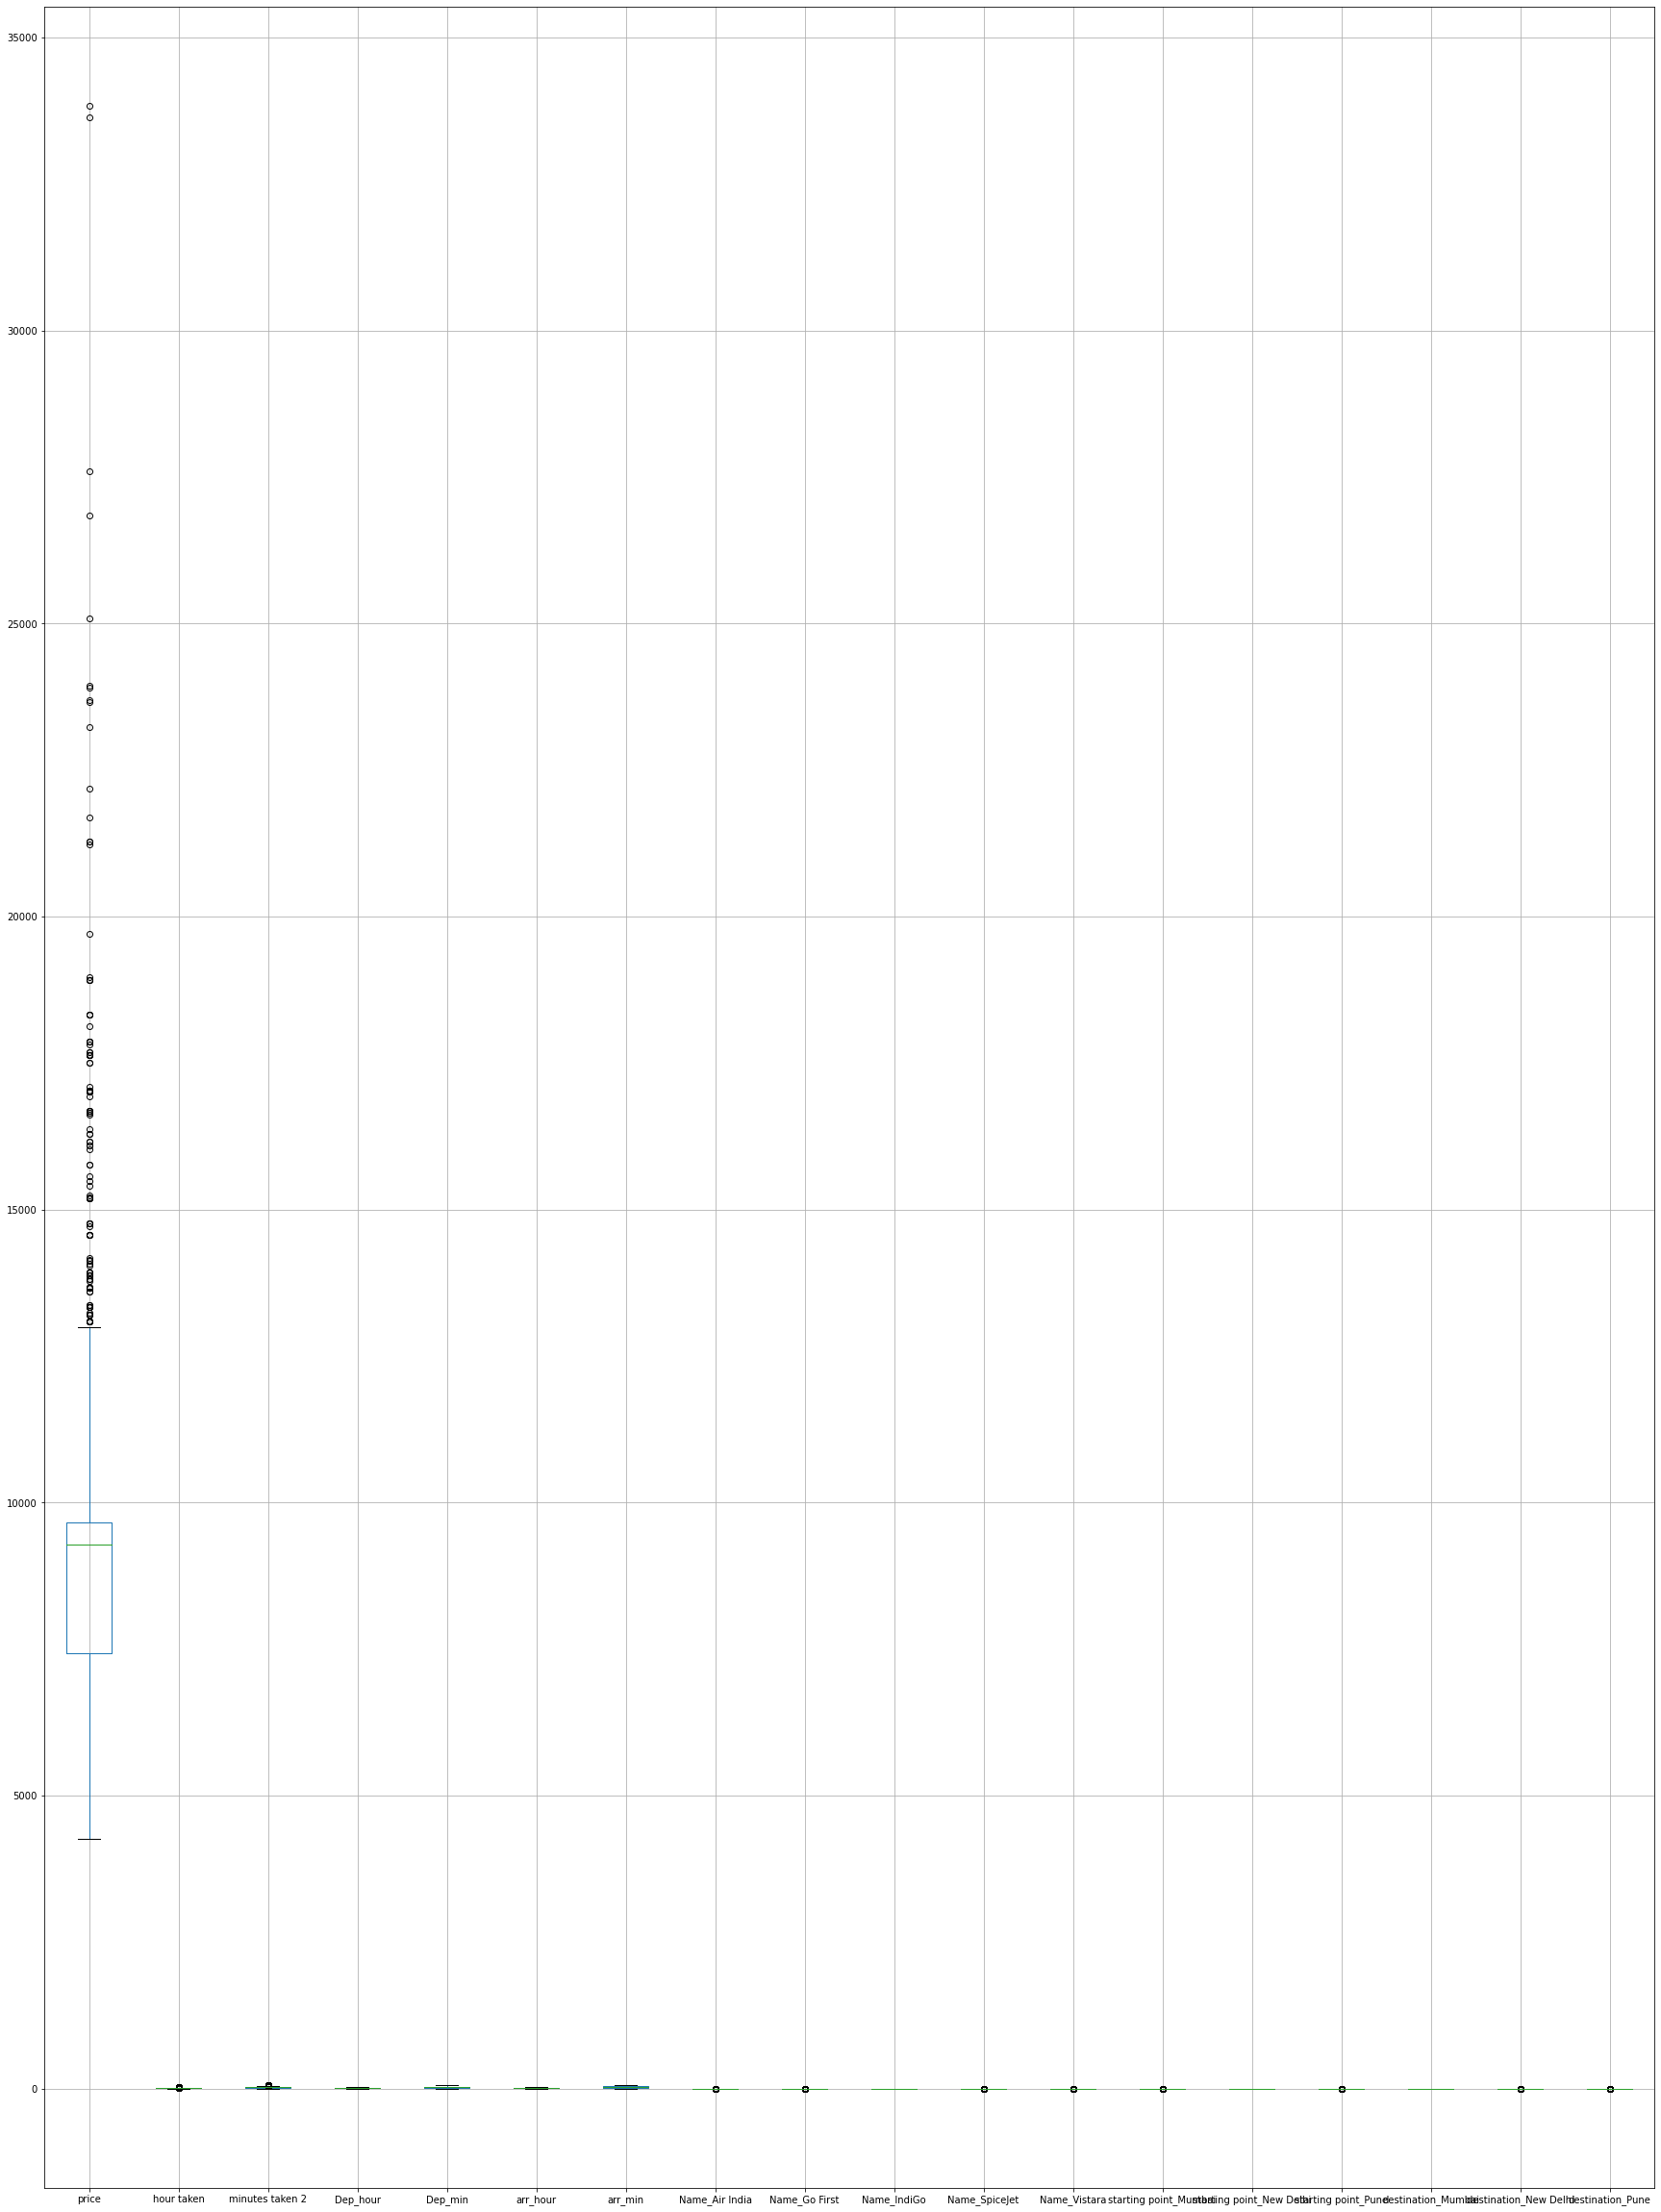

In [54]:
# plotting boxplot to identify outliers
data.boxplot(figsize=[30,50])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [55]:
# splitting the data in x and y form for test and train
y=data['price']

x=data.drop(columns=['price'])

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [57]:
#lr agoritm
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x,y)

LinearRegression()

In [58]:
lm.score(x_train,y_train)

0.3021677852252852

In [59]:
#using dtc algoritm
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor()
clf.fit(x_train,y_train)

DecisionTreeRegressor()

In [60]:
clf.score(x_train,y_train)

0.8016758909145979

In [61]:
y_pred=clf.predict(x_test)

In [62]:
clf.score(x_test,y_test)

0.2571241146246377

In [63]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train,y_train)

RandomForestRegressor()

In [64]:
y_pred =reg_rf.predict(x_test)

In [65]:
reg_rf.score(x_train,y_train)

0.7744426750862808

In [66]:

reg_rf.score(x_test,y_test)

0.4683799169344872

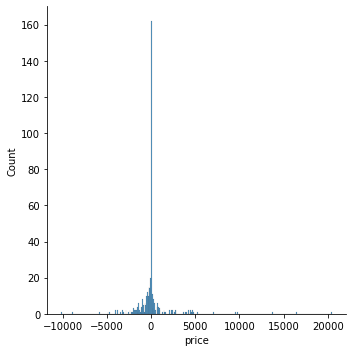

In [67]:
sns.displot(y_test-y_pred)
plt.show()

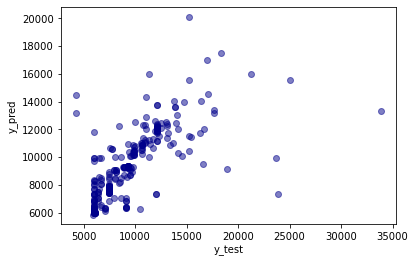

In [68]:
plt.scatter(y_test,y_pred,alpha =0.5,color="DarkBlue")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


In [69]:

from sklearn import metrics

In [70]:
print("MAE:" , metrics.mean_absolute_error(y_test,y_pred))
print("MSE:" , metrics.mean_squared_error(y_test,y_pred))
print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 891.3001793729239
MSE: 4903836.106948889
RMSE: 2214.4606808315402


In [71]:
metrics.r2_score(y_test, y_pred)

0.4683799169344872

In [72]:
from sklearn.model_selection import RandomizedSearchCV

In [73]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [74]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [75]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [76]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [77]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

In [78]:

prediction = rf_random.predict(x_test)

<Figure size 576x576 with 0 Axes>

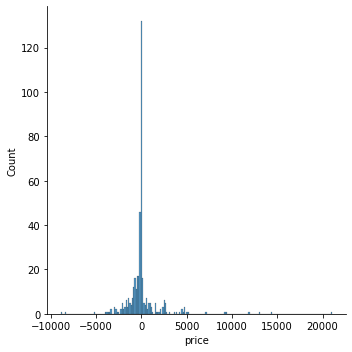

In [79]:
plt.figure(figsize =(8,8))
sns.displot(y_test-prediction)
plt.show()


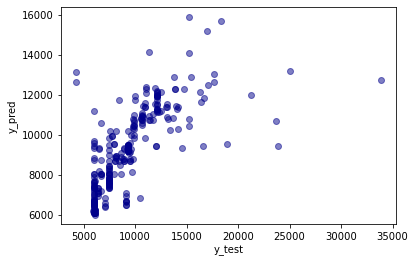

In [80]:
plt.scatter(y_test,prediction,alpha =0.5,color="DarkBlue")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


In [81]:
print("MAE:" , metrics.mean_absolute_error(y_test,prediction))
print("MSE:" , metrics.mean_squared_error(y_test,prediction))
print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 984.4738096490603
MSE: 4978916.473970062
RMSE: 2231.3485774235414


In [82]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)